# Market Segmentation in Insurance
<div class="sc-emEvRq gZqHzs sc-hGFITe jXToHY"><h3>WHAT IS MARKET SEGMENTATION?</h3>
<p>In marketing, market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into subgroups of consumers based on some type of shared characteristics.</p>
<h3>Objective :</h3>
<p>This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.</p>
<h3>Dataset</h3>
<p>The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.<br>
Variables of Dataset<br>
Balance<br>
Balance Frequency<br>
Purchases<br>
One-off Purchases<br>
Installment Purchases<br>
Cash Advance<br>
Purchases Frequency<br>
One-off Purchases Frequency<br>
Purchases Installments Frequency<br>
Cash Advance Frequency<br>
Cash Advance TRX<br>
Purchases TRX<br>
Credit Limit<br>
Payments<br>
Minimum Payments<br>
PRC Full payment<br>
Tenure<br>
Cluster</p>
<p>The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.</p></div>

In [3]:
# Importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('Customer Data.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Lets drop the CUST_ID column
data = data.drop('CUST_ID', axis=1)

In [7]:
# Lets check for missing data
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

As shown above, we have over 313 missing values in Minimum Payment and 1 missing value in Credit Limit.

In [8]:
# Lets fix the missing value in Credit Limit by replacing the Nan with the mean
cr_mean = np.mean(data.CREDIT_LIMIT)
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].replace(np.NAN, cr_mean)

In [9]:
# Lets fix the missing value in Minimum Payment by replacing the Nan with the mean
mini_pay_mean = np.mean(data.MINIMUM_PAYMENTS)
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].replace(np.NAN, cr_mean)

In [10]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

No more missing value

In [11]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        991.163641          0.153715    11.517318  
std     2895.063757       2424.140513          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        931.596638          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

(17.5, -0.5)

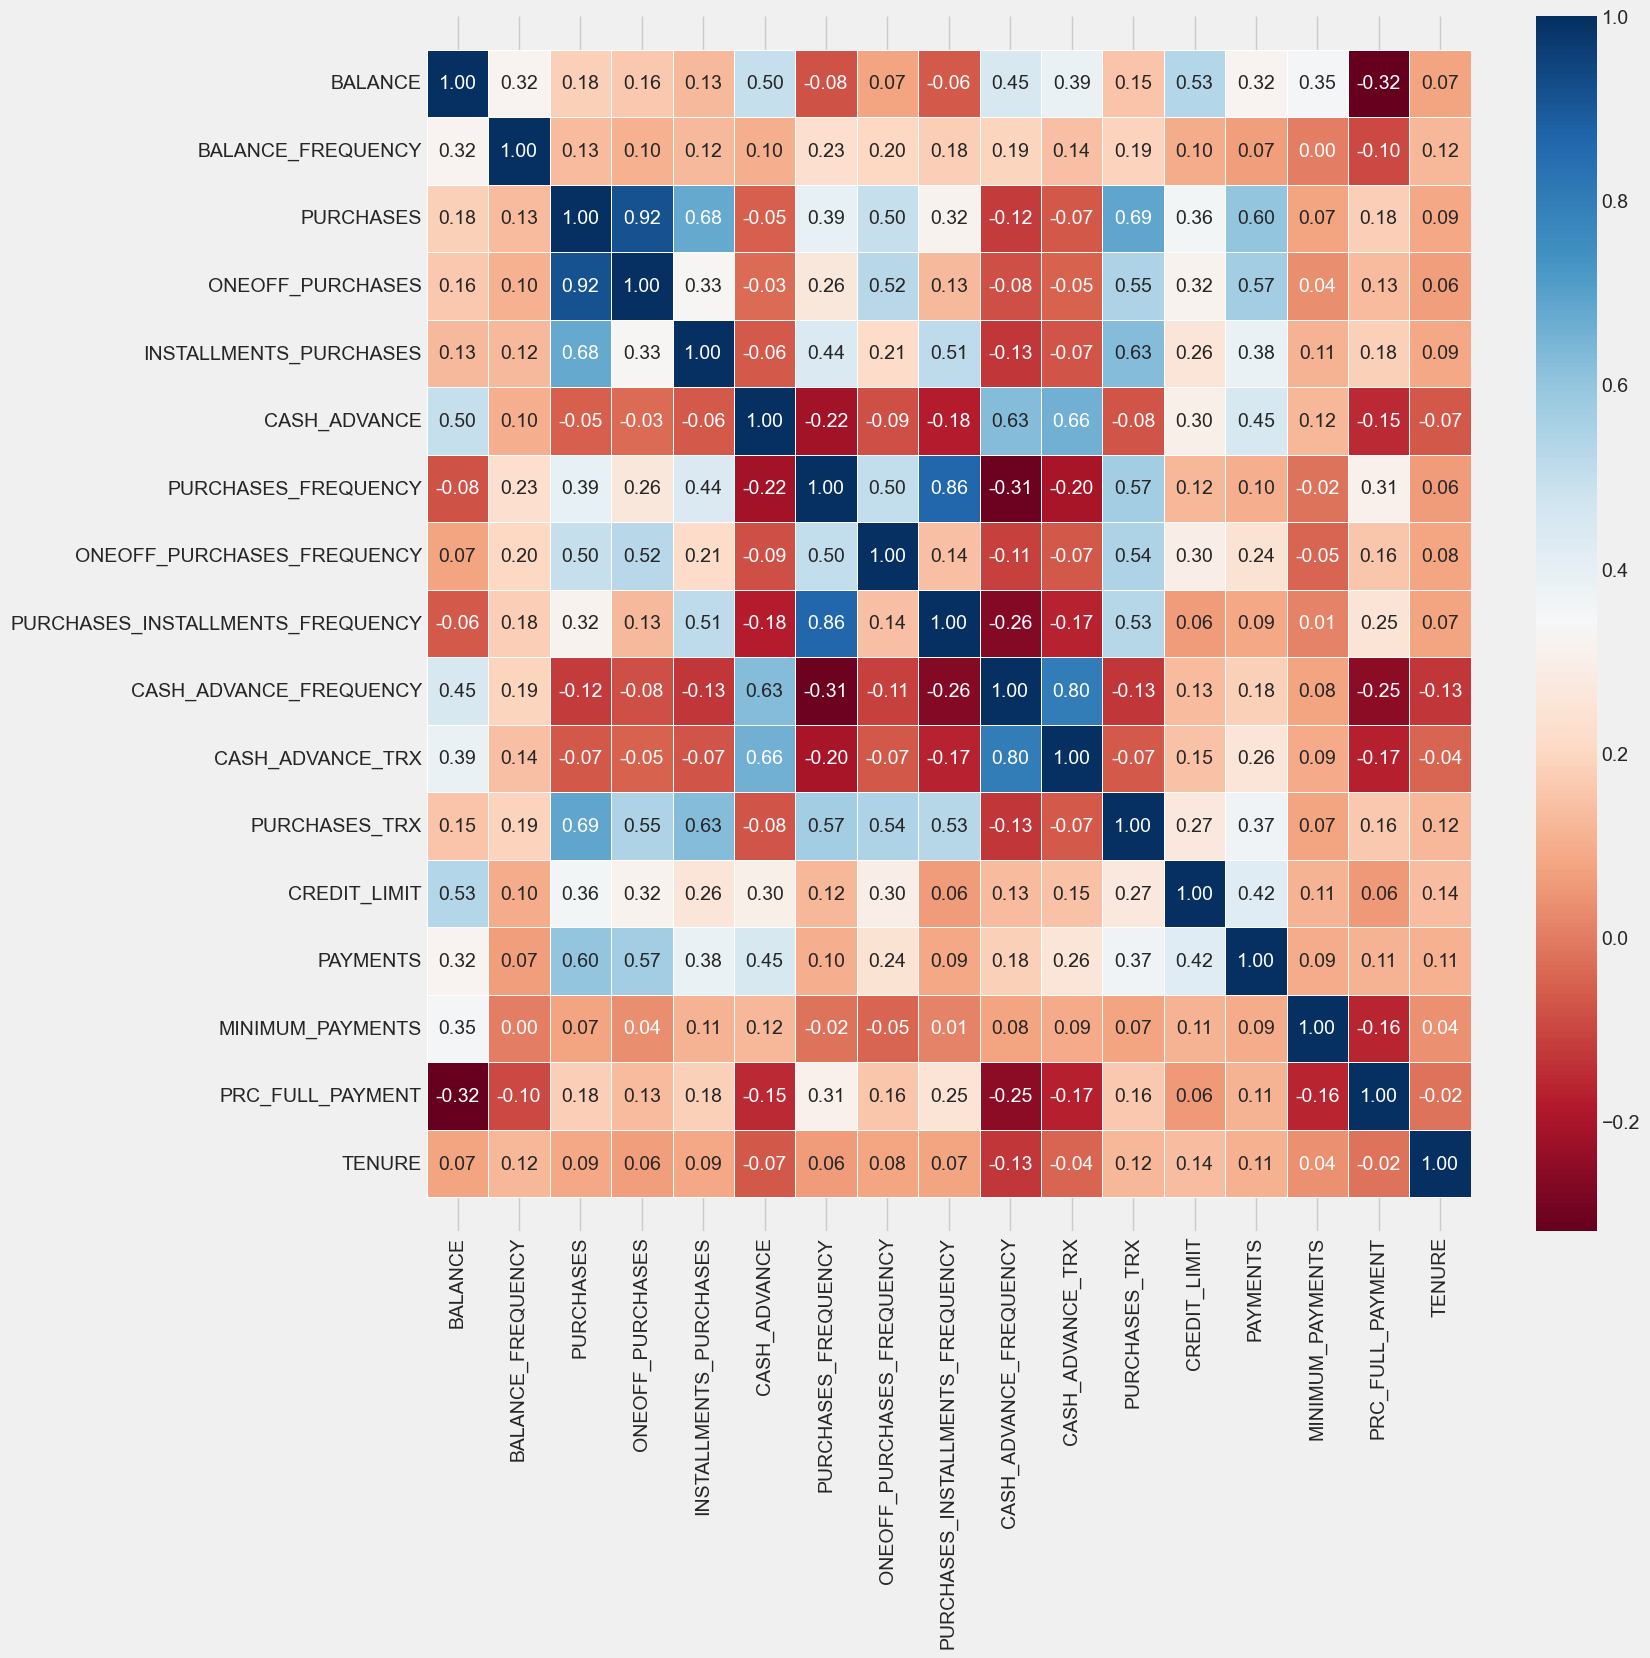

In [12]:
# Checking for correletion
# Lets know the correlations between features using Heat Map!
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [13]:
# The correlation matrix
corr_mat = data.corr()

# Striping out the diagonal values for the next step
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           0.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           0.000000   0.133674   
PURCHASES                         0.181261           0.133674   0.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.353675           0.001976   0.074949   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          0.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                0.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.035930                0.111059   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          0.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             0.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.123367            -0.017276   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

In [14]:
# Pairwise maximal correlations 
corr_max  = corr_mat.abs().max().to_frame()
corr_id_max = corr_mat.abs().idxmax().to_frame()

# dataframe aggrigation and processing
pair_features_corr = pd.merge(corr_id_max, corr_max, on = corr_max.index)
pair_features_corr = pair_features_corr.rename(columns = {'key_0':'1st Feature', '0_x':'2nd Feature', '0_y':'Correlation'})\
                                                .sort_values('Correlation', ascending=False)\
                                                .reset_index().drop('index', axis=1)
pair_features_corr

1st Feature                       2nd Feature  \
0                          PURCHASES                  ONEOFF_PURCHASES   
1                   ONEOFF_PURCHASES                         PURCHASES   
2   PURCHASES_INSTALLMENTS_FREQUENCY               PURCHASES_FREQUENCY   
3                PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
4             CASH_ADVANCE_FREQUENCY                  CASH_ADVANCE_TRX   
5                   CASH_ADVANCE_TRX            CASH_ADVANCE_FREQUENCY   
6                      PURCHASES_TRX                         PURCHASES   
7             INSTALLMENTS_PURCHASES                         PURCHASES   
8                       CASH_ADVANCE                  CASH_ADVANCE_TRX   
9                           PAYMENTS                         PURCHASES   
10        ONEOFF_PURCHASES_FREQUENCY                     PURCHASES_TRX   
11                      CREDIT_LIMIT                           BALANCE   
12                           BALANCE                      CREDIT_LIMIT   
13                  MINIMUM_PAYMENTS                           BALANCE   
14                 BALANCE_FREQUENCY                           BALANCE   
15                  PRC_FULL_PAYMENT                           BALANCE   
16                            TENURE                      CREDIT_LIMIT   

    Correlation  
0      0.916845  
1      0.916845  
2      0.862934  
3      0.862934  
4      0.799561  
5      0.799561  
6      0.689561  
7      0.679896  
8      0.656498  
9      0.603264  
10     0.544869  
11     0.531267  
12     0.531267  
13     0.353675  
14     0.322412  
15     0.318959  
16     0.139034

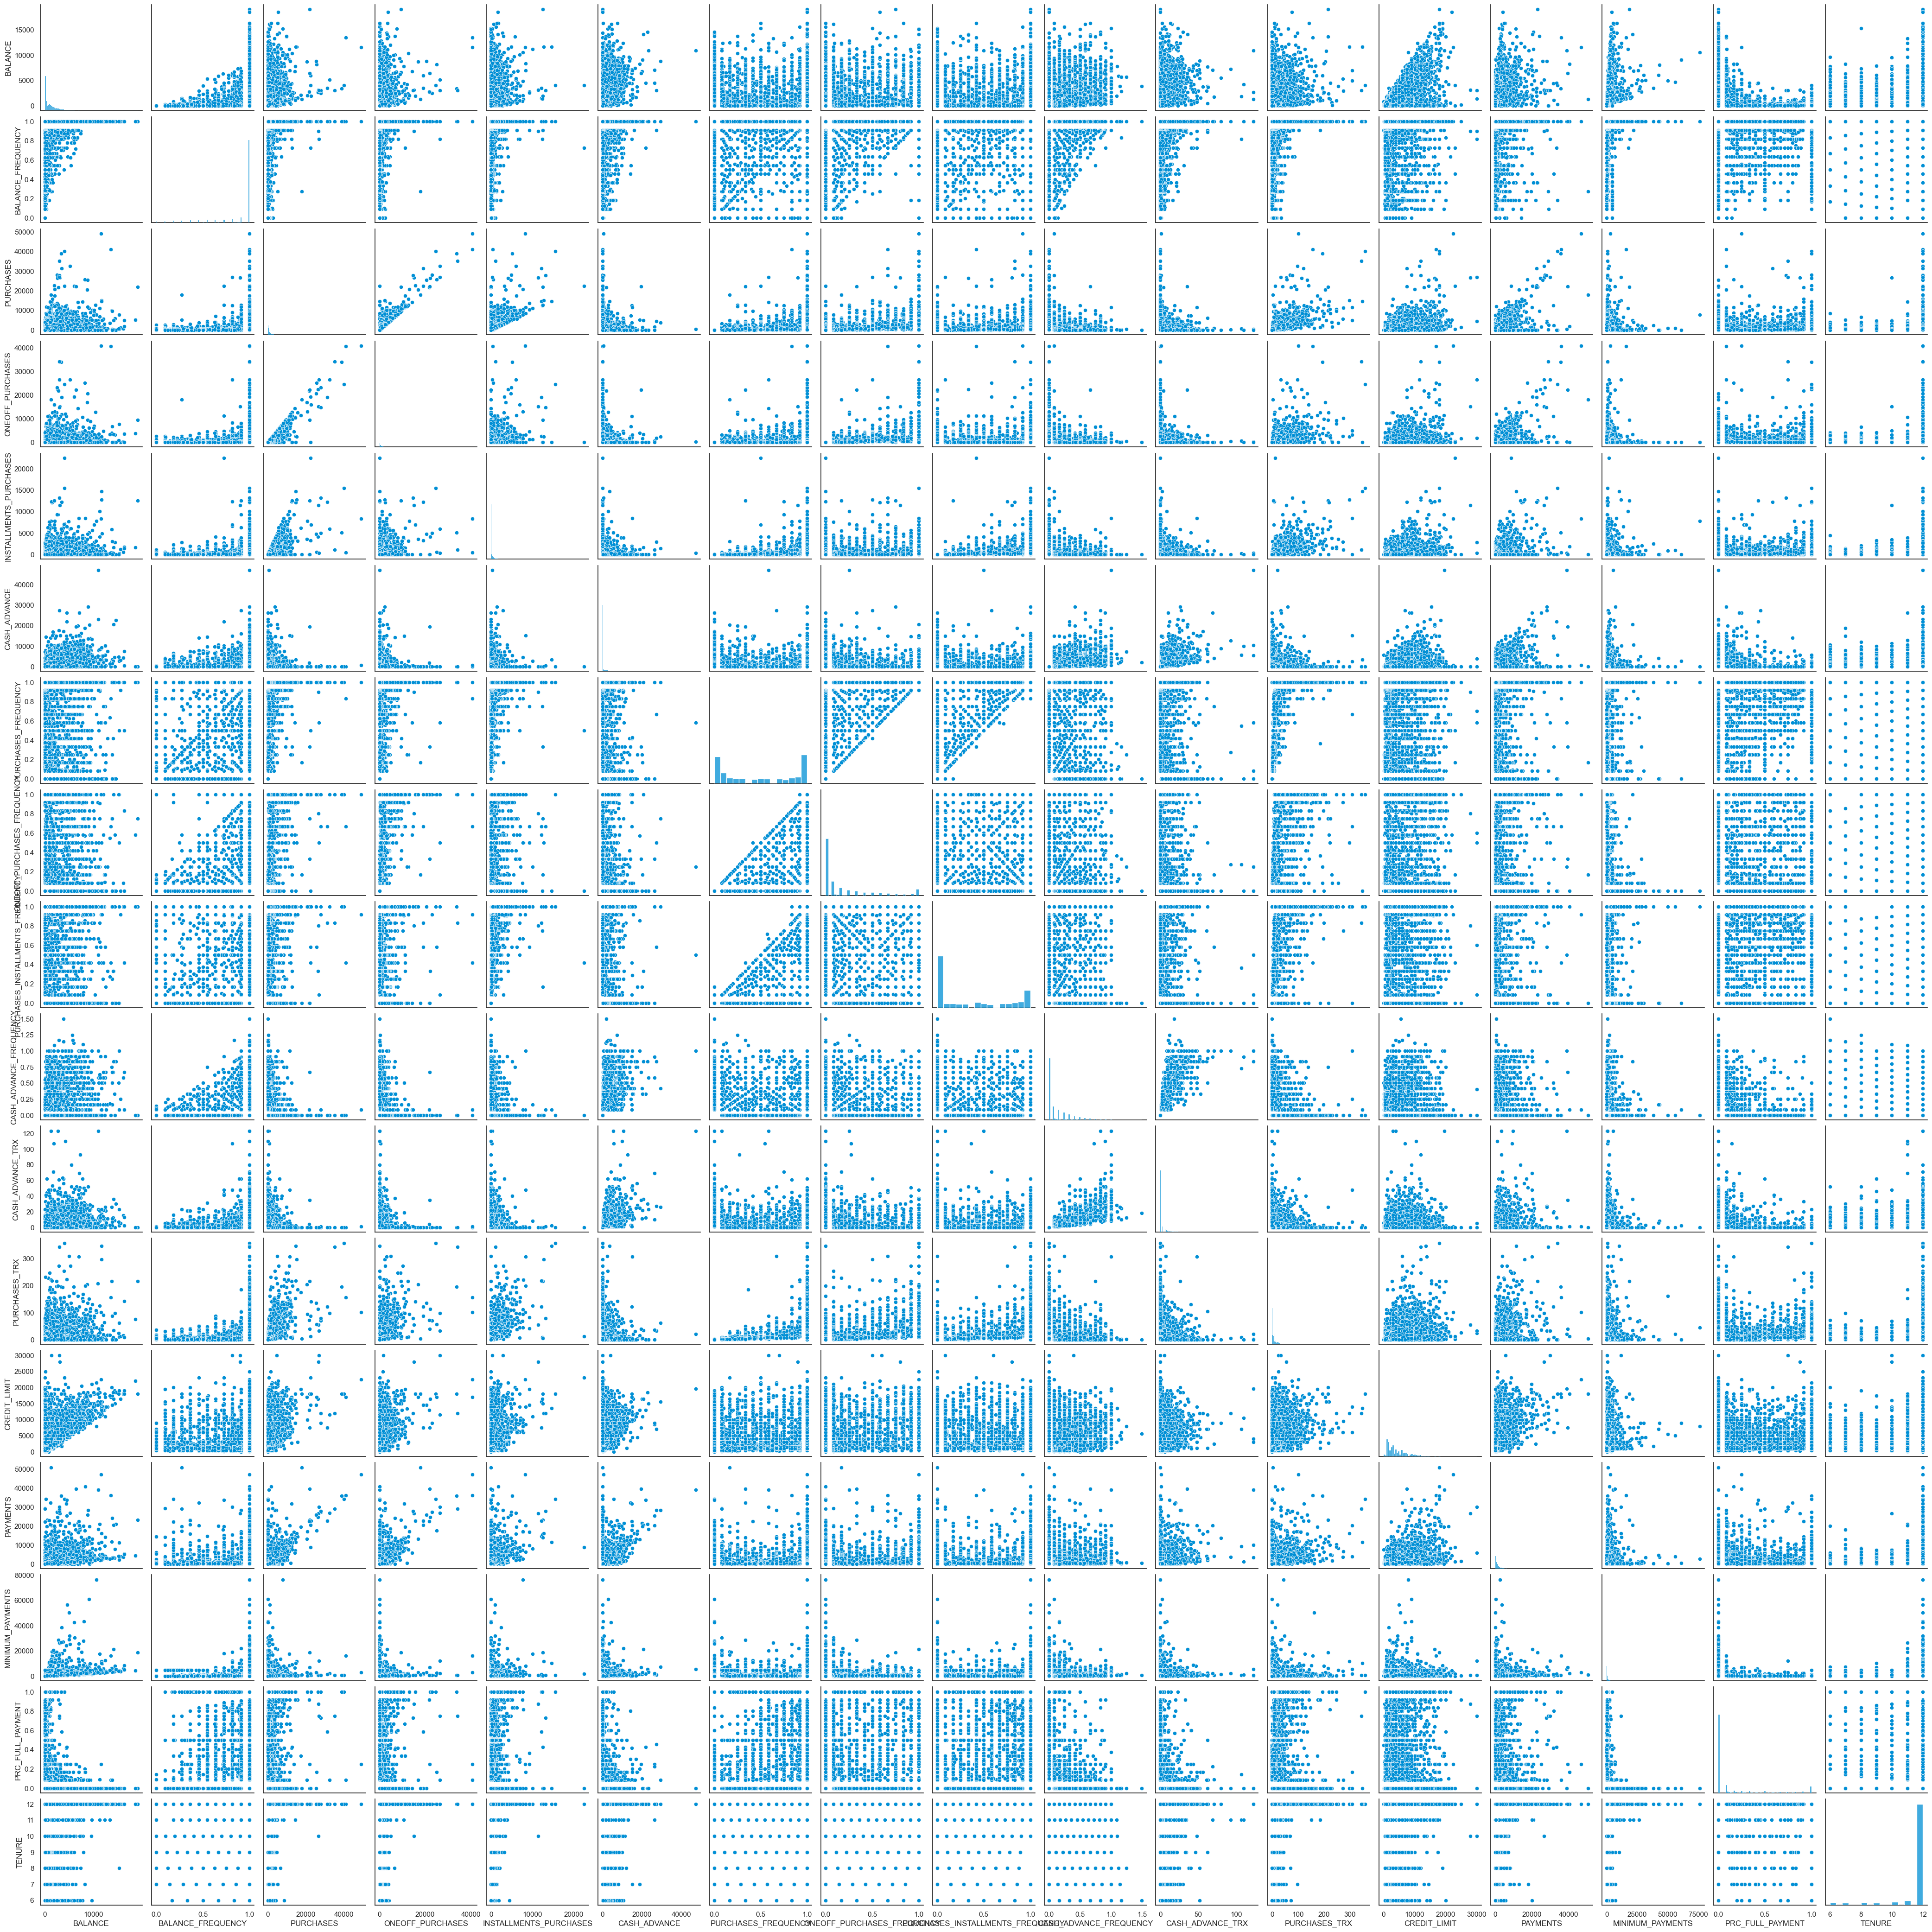

In [19]:
sns.set_context('notebook')
sns.set_style('white')

sns.pairplot(data)

In [15]:
skew_columns = (data.skew().sort_values(ascending=False)).to_frame("Skewness Value")
skew_columns

Skewness Value
MINIMUM_PAYMENTS                       12.283207
ONEOFF_PURCHASES                       10.045083
PURCHASES                               8.144269
INSTALLMENTS_PURCHASES                  7.299120
PAYMENTS                                5.907620
CASH_ADVANCE_TRX                        5.721298
CASH_ADVANCE                            5.166609
PURCHASES_TRX                           4.630655
BALANCE                                 2.393386
PRC_FULL_PAYMENT                        1.942820
CASH_ADVANCE_FREQUENCY                  1.828686
ONEOFF_PURCHASES_FREQUENCY              1.535613
CREDIT_LIMIT                            1.522549
PURCHASES_INSTALLMENTS_FREQUENCY        0.509201
PURCHASES_FREQUENCY                     0.060164
BALANCE_FREQUENCY                      -2.023266
TENURE                                 -2.943017

In [16]:
skew_columns = (data.skew().sort_values(ascending=False)).to_frame("skewness_value")
skew_columns = skew_columns.query('skewness_value > 0.75')
skew_columns

skewness_value
MINIMUM_PAYMENTS                 12.283207
ONEOFF_PURCHASES                 10.045083
PURCHASES                         8.144269
INSTALLMENTS_PURCHASES            7.299120
PAYMENTS                          5.907620
CASH_ADVANCE_TRX                  5.721298
CASH_ADVANCE                      5.166609
PURCHASES_TRX                     4.630655
BALANCE                           2.393386
PRC_FULL_PAYMENT                  1.942820
CASH_ADVANCE_FREQUENCY            1.828686
ONEOFF_PURCHASES_FREQUENCY        1.535613
CREDIT_LIMIT                      1.522549

In [17]:
# Perform log transform on skewed columns
for col in skew_columns['skewness_value'].index.tolist():
    data[col] = np.log1p(data[col])

In [18]:
skew_columns = (data.skew().sort_values(ascending=False)).to_frame("Skewness Value")
skew_columns

Skewness Value
PRC_FULL_PAYMENT                        1.746046
CASH_ADVANCE_FREQUENCY                  1.455462
ONEOFF_PURCHASES_FREQUENCY              1.290617
CASH_ADVANCE_TRX                        0.940131
PURCHASES_INSTALLMENTS_FREQUENCY        0.509201
MINIMUM_PAYMENTS                        0.269565
CASH_ADVANCE                            0.262594
ONEOFF_PURCHASES                        0.185854
PURCHASES_FREQUENCY                     0.060164
PURCHASES_TRX                           0.032697
INSTALLMENTS_PURCHASES                 -0.024981
CREDIT_LIMIT                           -0.101564
PURCHASES                              -0.764492
BALANCE                                -0.861021
PAYMENTS                               -1.778312
BALANCE_FREQUENCY                      -2.023266
TENURE                                 -2.943017

In [19]:
# Checking the data types
data.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [20]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.735304           0.818182   4.568506          0.000000   
1  8.071989           0.909091   0.000000          0.000000   
2  7.822504           1.000000   6.651791          6.651791   
3  7.419183           0.636364   7.313220          7.313220   
4  6.707735           1.000000   2.833213          2.833213   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.166667   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      5.331694             0.083333   
4                0.000000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.693147                          0.000000   
3                    0.080042                          0.000000   
4                    0.080042                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       1.098612      6.908755   
1                0.223144          1.609438       0.000000      8.853808   
2                0.000000          0.000000       2.564949      8.922792   
3                0.080042          0.693147       0.693147      8.922792   
4                0.000000          0.000000       0.693147      7.090910   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  5.312231          4.945277          0.000000      12  
1  8.319725          6.978531          0.200671      12  
2  6.434654          6.442994          0.000000      12  
3  0.000000          8.410821          0.000000      12  
4  6.521114          5.504483          0.000000      12

In [21]:
np.unique(data.TENURE)

array([ 6,  7,  8,  9, 10, 11, 12])

In [22]:
# Scaling the float columns in our preprocessed dataset
from sklearn.preprocessing import StandardScaler

float_columns = [col for col in data.columns if col != 'TENURE']
sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])
data.tail()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945 -1.379634           0.518084   0.266574         -0.987090   
8946 -1.568051           0.518084   0.276841         -0.987090   
8947 -1.473834          -0.185477   0.027374         -0.987090   
8948 -1.733775          -0.185477  -1.679855         -0.987090   
8949 -0.118301          -0.889033   0.719365          1.168619   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                0.754107     -0.930733             1.269843   
8946                0.763821     -0.930733             1.269843   
8947                0.527794     -0.930733             0.854576   
8948               -1.087454      0.086038            -1.221758   
8949               -1.087454      0.429953             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                   -0.732480                          1.179833   
8946                   -0.732480                          1.179833   
8947                   -0.732480                          0.760469   
8948                   -0.732480                         -0.916995   
8949                    1.625252                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945               -0.724360         -0.810069       0.037255     -1.447207   
8946               -0.724360         -0.810069       0.037255     -1.447207   
8947               -0.724360         -0.810069      -0.074955     -1.447207   
8948                0.259328          0.278464      -1.379210     -2.291713   
8949                1.111432          0.278464       0.934155     -1.224955   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945 -0.525121         -1.672075          1.359774       6  
8946 -0.628912          1.912685         -0.556368       6  
8947 -1.391318         -1.262617          0.498161       6  
8948 -1.661097         -1.569330          0.498161       6  
8949 -1.547475         -1.208453         -0.556368       6

### Machine Learning Models

#### KMeans Algorithm

In [57]:
from sklearn.cluster import KMeans

# Create and fit a range of models
km_list = list()

for clust in range(1,15):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

[Text(0.5, 0, 'Cluster'),
 Text(0, 0.5, 'Inertia'),
 Text(0.5, 1.0, 'The Elbow Method')]

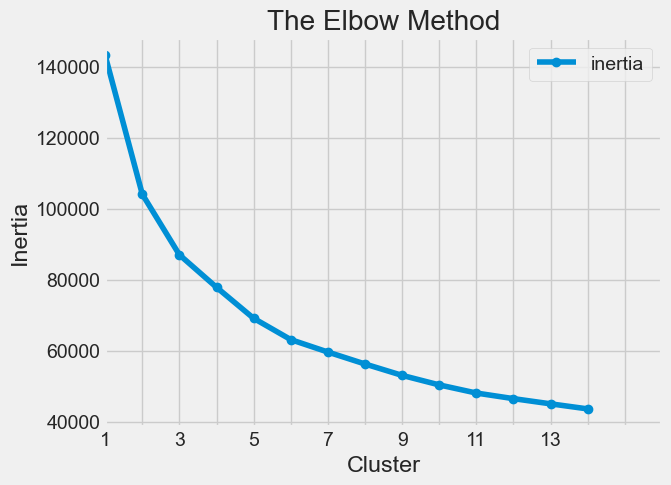

In [58]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,15,1))
ax.set_xlim(0,15)
ax.set(xlabel='Cluster', ylabel='Inertia', title='The Elbow Method')

In [59]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[float_columns])
    score = silhouette_score(data[float_columns], kmeans.labels_)
    silhouette_scores.append(score)

best_k = np.argmax(silhouette_scores) + 2  # Adding 2 to start from k=2
print("Best k according to silhouette score:", best_k)

Best k according to silhouette score: 4


In [66]:
km = KMeans(n_clusters=4, random_state=42)
km = km.fit(data[float_columns])

In [67]:
data['k-means'] = km.predict(data[float_columns])
data.sample(7)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8624  0.377075           0.518084   0.290769         -0.987090   
1680  1.167895           0.518084  -0.259426          0.289171   
5883 -0.123280           0.518084   0.831458          1.269334   
1740  1.013334           0.518084  -1.679855         -0.987090   
3812  0.686000           0.518084   0.554586          1.020564   
802  -0.856927          -2.935753  -1.679855         -0.987090   
8041  0.905678           0.518084  -1.679855         -0.987090   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8624                0.776999     -0.930733             1.269843   
1680               -1.087454      1.569444            -1.014125   
5883               -1.087454     -0.930733             1.062211   
1740               -1.087454      0.992075            -1.221758   
3812               -1.087454      0.598683            -0.183590   
802                -1.087454      1.280233            -1.221758   
8041               -1.087454      0.707656            -1.221758   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8624                   -0.732480                          1.599199   
1680                   -0.363042                         -0.916995   
5883                    2.270328                         -0.916995   
1740                   -0.732480                         -0.916995   
3812                    0.875141                         -0.916995   
802                    -0.732480                         -0.916995   
8041                   -0.732480                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8624               -0.724360         -0.810069       0.487865     -1.447207   
1680                1.863046          2.296657      -0.874655      0.835591   
5883               -0.724360         -0.810069       1.143564      1.361133   
1740                0.699592          0.784603      -1.379210      1.088901   
3812                0.259328          0.563506      -0.074955     -0.602091   
802                -0.213583          0.278464      -1.379210     -0.107577   
8041                1.111432          1.565826      -1.379210     -0.107577   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  k-means  
8624 -0.525098          0.320577         -0.556368      12        0  
1680  1.386995          1.083956         -0.556368      12        1  
5883  0.164368         -0.565026          0.803155      12        2  
1740  0.163000          0.630187         -0.556368      12        1  
3812 -0.085019          0.280016         -0.556368      12        3  
802   1.784719          1.180512          1.359774      12        1  
8041  0.146156          1.513802         -0.556368      12        1

In [68]:
# Group by Class and K-means for comparsion between clustered classes and actual classes 
(data[['TENURE','k-means']]
 .groupby(['TENURE','k-means'])
 .size()
 .to_frame()
 .rename(columns={0:'Number'}))

Number
TENURE k-means        
6      0            86
       1            75
       2             9
       3            34
7      0            62
       1            73
       2            15
       3            40
8      0            72
       1            73
       2            16
       3            35
9      0            67
       1            64
       2            12
       3            32
10     0            91
       1            82
       2            25
       3            38
11     0           101
       1           151
       2            56
       3            57
12     0          2453
       1          1981
       2          1899
       3          1251

In [69]:
# Performing PCA in 2 Dimension for KMeans clustering
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

PCA1      PCA2
0    -0.548579 -2.921109
1    -3.320312  1.075899
2     1.690659  1.371628
3    -1.510666 -0.275093
4    -1.279327 -1.645413
...        ...       ...
8945  1.149258 -3.488847
8946  0.540561 -2.377620
8947  0.387817 -3.796407
8948 -3.300353 -3.423727
8949 -0.318642  0.249890

[8950 rows x 2 columns]

In [70]:
kmeans_model = KMeans(n_clusters=4)

kmeans_model.fit_predict(data)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})], axis=1)

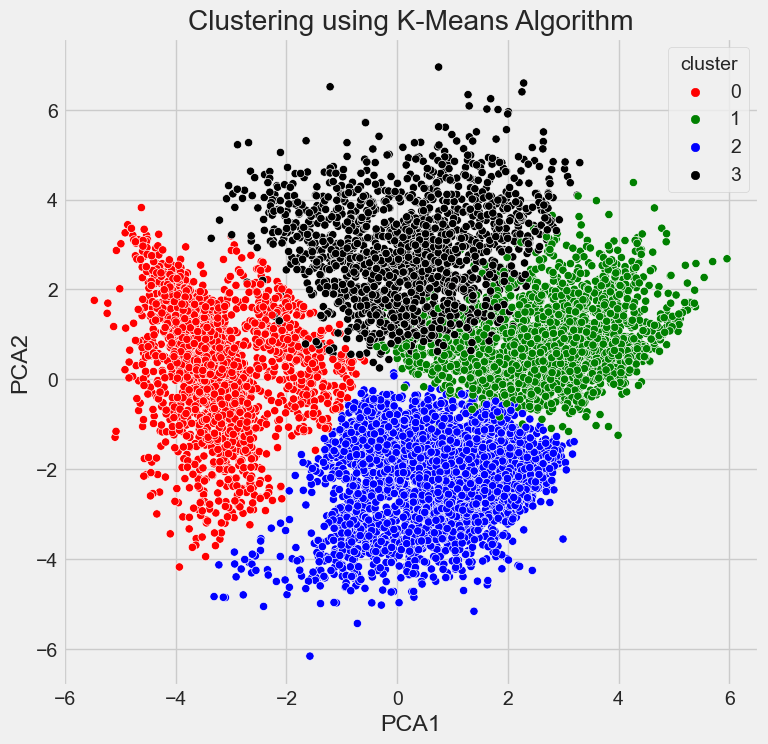

In [72]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x = "PCA1", y = "PCA2", hue = "cluster", data = pca_df_kmeans, palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

#### Checking for accuracy using Decision Tree

In [73]:
from sklearn.model_selection import train_test_split
X = data.drop('k-means', axis=1)
y = data['k-means']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [75]:
y_pred = dt.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[832  11  34   9]
 [  5 713   0  15]
 [ 28   0 603   7]
 [  6  11  10 401]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       886
           1       0.97      0.97      0.97       733
           2       0.93      0.95      0.94       638
           3       0.93      0.94      0.93       428

    accuracy                           0.95      2685
   macro avg       0.95      0.95      0.95      2685
weighted avg       0.95      0.95      0.95      2685



#### Agglomerative Algorithm

In [77]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
agglo = agglo.fit(data[float_columns])

In [78]:
data['agglo'] = agglo.fit_predict(data[float_columns])
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.205218          -0.249434  -0.113532         -0.987090   
1  0.948918           0.134325  -1.679855         -0.987090   
2  0.824993           0.518084   0.600727          1.062022   
3  0.624653          -1.016953   0.827499          1.265778   
4  0.271260           0.518084  -0.708481         -0.114307   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.394480     -0.930733            -0.806490   
1               -1.087454      1.528788            -1.221758   
2               -1.087454     -0.930733             1.269843   
3               -1.087454      0.564372            -1.014125   
4               -1.087454     -0.930733            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.732480                         -0.707313   
1                   -0.732480                         -0.916995   
2                    2.466762                         -0.916995   
3                   -0.363042                         -0.916995   
4                   -0.363042                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.724360         -0.810069      -0.579510     -1.447207   
1                0.699592          0.784603      -1.379210      0.925998   
2               -0.724360         -0.810069       0.487865      1.010166   
3               -0.213583         -0.123281      -0.874655      1.010166   
4               -0.724360         -0.810069      -0.874655     -1.224955   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  k-means  agglo  
0 -0.824484         -0.847355         -0.556368      12        0      2  
1  1.065033          0.771976          0.391958      12        1      3  
2 -0.119300          0.345461         -0.556368      12        2      0  
3 -4.161996          1.912685         -0.556368      12        1      2  
4 -0.064979         -0.401991         -0.556368      12        0      0

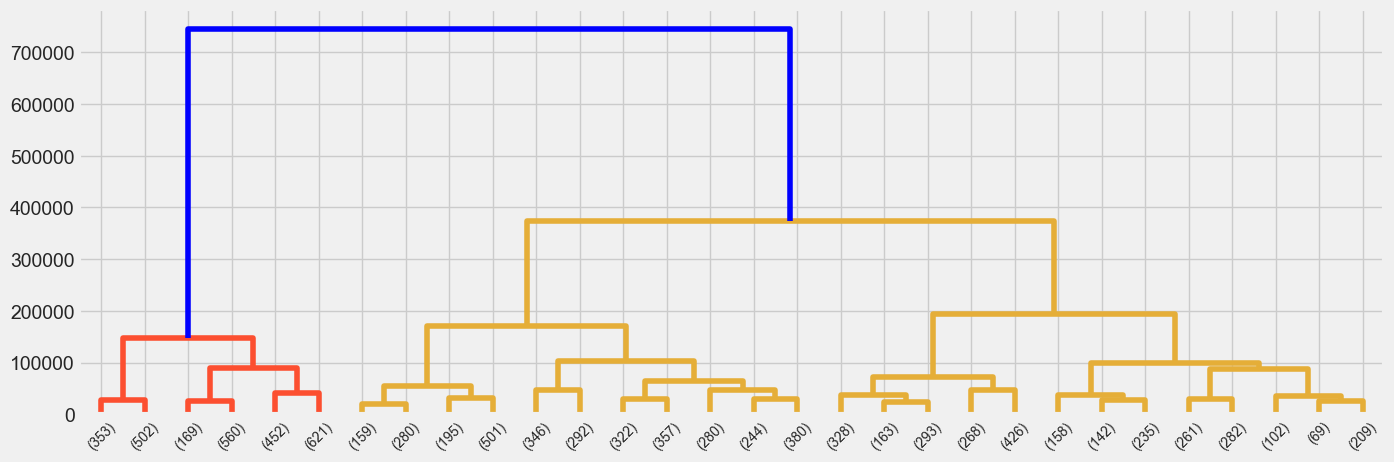

In [79]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(agglo.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

In [80]:
# Group by Class and Agglomerative clustering for comparsion between clustered classes and actual classes 
(data[['TENURE','agglo']]
 .groupby(['TENURE','agglo'])
 .size()
 .to_frame()
 .rename(columns={0:'Number'}))

Number
TENURE agglo        
6      0          58
       1           9
       2          78
       3          59
7      0          68
       1          14
       2          53
       3          55
8      0          66
       1          15
       2          59
       3          56
9      0          51
       1          13
       2          60
       3          51
10     0          71
       1          25
       2          71
       3          69
11     0         112
       1          47
       2          82
       3         124
12     0        2243
       1        1629
       2        2138
       3        1574

#### MeanShift Algorithm

In [139]:
from sklearn.cluster import MeanShift
ms  = MeanShift(bandwidth=3.6, n_jobs=-1) 
ms = ms.fit(data[float_columns])

In [140]:
np.unique(ms.labels_)

array([0, 1, 2, 3])

In [141]:
data['MeanShift'] = ms.fit_predict(data[float_columns])
data.tail()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945 -1.379634           0.518084   0.266574         -0.987090   
8946 -1.568051           0.518084   0.276841         -0.987090   
8947 -1.473834          -0.185477   0.027374         -0.987090   
8948 -1.733775          -0.185477  -1.679855         -0.987090   
8949 -0.118301          -0.889033   0.719365          1.168619   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                0.754107     -0.930733             1.269843   
8946                0.763821     -0.930733             1.269843   
8947                0.527794     -0.930733             0.854576   
8948               -1.087454      0.086038            -1.221758   
8949               -1.087454      0.429953             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                   -0.732480                          1.179833   
8946                   -0.732480                          1.179833   
8947                   -0.732480                          0.760469   
8948                   -0.732480                         -0.916995   
8949                    1.625252                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945               -0.724360         -0.810069       0.037255     -1.447207   
8946               -0.724360         -0.810069       0.037255     -1.447207   
8947               -0.724360         -0.810069      -0.074955     -1.447207   
8948                0.259328          0.278464      -1.379210     -2.291713   
8949                1.111432          0.278464       0.934155     -1.224955   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  k-means  agglo  \
8945 -0.525121         -1.672075          1.359774       6        0      2   
8946 -0.628912          1.912685         -0.556368       6        0      2   
8947 -1.391318         -1.262617          0.498161       6        0      2   
8948 -1.661097         -1.569330          0.498161       6        1      3   
8949 -1.547475         -1.208453         -0.556368       6        3      0   

      MeanShift  
8945          0  
8946          0  
8947          0  
8948          1  
8949          0

In [142]:
# Group by Class and Agglomerative clustering for comparsion between clustered classes and actual classes 
(data[['TENURE','MeanShift']]
 .groupby(['TENURE','MeanShift'])
 .size()
 .to_frame()
 .rename(columns={0:'Number'}))

Number
TENURE MeanShift        
6      0             101
       1              87
       2              16
7      0              89
       1              87
       2              14
8      0              93
       1              89
       2              14
9      0              83
       1              80
       2              12
10     0             118
       1             105
       2              12
       3               1
11     0             176
       1             180
       2               8
       3               1
12     0            4881
       1            2443
       2             229
       3              31

#### DBSCAN

In [171]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5, min_samples=18, metric='euclidean')
dbs = dbs.fit(data[float_columns])

In [172]:
np.unique(dbs.labels_)

array([-1,  0,  1,  2])

In [175]:
data['dbscan'] = dbs.fit_predict(data[float_columns])

In [176]:
# Group by Class and DBSCAN for comparsion between clustered classes and actual classes 
(data[['TENURE','dbscan']]
 .groupby(['TENURE','dbscan'])
 .size()
 .to_frame()
 .rename(columns={0:'Number'}))

Number
TENURE dbscan        
6      -1         204
7      -1         190
8      -1         195
        0           1
9      -1         174
        0           1
10     -1         230
        0           6
11     -1         351
        0          13
        1           1
12     -1        7337
        0         217
        1          12
        2          18